In [1]:
from pathlib import Path

import pandas as pd

In [16]:
sorted(labels[~labels.valid].source_jpeg.tolist())

['/Users/kyledorman/data/estuary/label_studio/00025/big_sur_river/images/20201004_161433_100d_3B_AnalyticMS.jpg',
 '/Users/kyledorman/data/estuary/label_studio/00025/big_sur_river/images/20201126_190024_29_240f_3B_AnalyticMS.jpg',
 '/Users/kyledorman/data/estuary/label_studio/00025/big_sur_river/images/20220209_184736_09_227b_3B_AnalyticMS.jpg',
 '/Users/kyledorman/data/estuary/label_studio/00025/big_sur_river/images/20220307_181831_52_2231_3B_AnalyticMS.jpg',
 '/Users/kyledorman/data/estuary/label_studio/00025/big_sur_river/images/20230103_183106_39_2486_3B_AnalyticMS.jpg',
 '/Users/kyledorman/data/estuary/label_studio/00025/big_sur_river/images/20230717_183350_00_248e_3B_AnalyticMS.jpg',
 '/Users/kyledorman/data/estuary/label_studio/00025/carmel/images/20210704_180229_48_2212_3B_AnalyticMS.jpg',
 '/Users/kyledorman/data/estuary/label_studio/00025/goleta/images/20200713_185308_12_105e_3B_AnalyticMS.jpg',
 '/Users/kyledorman/data/estuary/label_studio/00025/little_sur/images/20191111_17

In [8]:
labels = pd.read_csv("/Users/kyledorman/data/estuary/label_studio/00025/labels.csv")
labels["valid"] = labels.label.apply(lambda a: a != "unsure")
valid_counts = labels.groupby("region").valid.sum()
valid_counts

region
big_sur_river             194
carmel                    199
goleta                    199
little_sur                197
los_penasquitos_lagoon    192
malibu_lagoon             196
navarro_river             198
pismo_creek_lagoon        193
russian_river             195
san_dieguito_lagoon       200
san_elijo_lagoon          199
san_mateo_lagoon          197
santa_margarita           198
topanga                   197
ventura                   195
Name: valid, dtype: int64

In [9]:
BASE = Path("/Users/kyledorman/data/estuary/dove/results/")

region_paths = []
for region in valid_counts.index:
    num_files = len(list(BASE.glob(f"*/*/{region}/files/*_SR_clip.tif")))
    region_paths.append({"region": region, "files": num_files, "labeled": valid_counts.loc[region]})

df = pd.DataFrame(region_paths)
df

,region,files,labeled
0,big_sur_river,893,194
1,carmel,755,199
2,goleta,979,199
3,little_sur,831,197
4,los_penasquitos_lagoon,896,192
5,malibu_lagoon,1025,196
6,navarro_river,793,198
7,pismo_creek_lagoon,1109,193
8,russian_river,934,195
9,san_dieguito_lagoon,916,200


In [11]:
df.to_csv("/Users/kyledorman/data/estuary/display/region_stats.csv", index=False)

0.9386819876201224


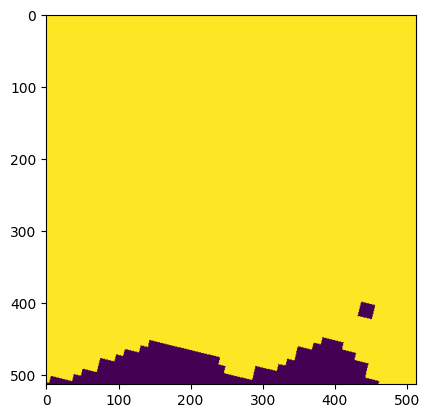

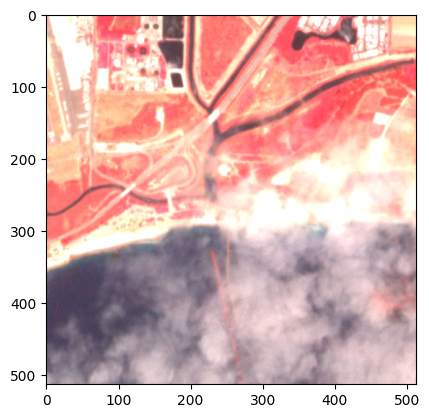

In [47]:
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show

with rasterio.open(
    "/Users/kyledorman/data/estuary/dove/results/2020/7/goleta/files/20200713_185308_12_105e_3B_udm2_clip.tif"
) as src:
    plt.figure()
    a = src.read(1)
    print(a.sum() / a.shape[0] / a.shape[1])
    show(a == 1)

with rasterio.open(
    "/Users/kyledorman/data/estuary/dove/results/2020/7/goleta/files/20200713_185308_12_105e_3B_AnalyticMS_SR_clip.tif"
) as src:
    plt.figure()
    b = src.read()
    show(b[[3, 2, 1]].clip(0, 2000) / 2000)

(array([1.29719e+05, 5.26810e+04, 4.32750e+04, 2.28740e+04, 7.80100e+03,
        3.90500e+03, 1.74400e+03, 8.73000e+02, 2.40000e+02, 5.70000e+01]),
 array([1.02112676, 1.73744887, 2.45377097, 3.17009308, 3.88641519,
        4.60273729, 5.3190594 , 6.03538151, 6.75170361, 7.46802572,
        8.18434783]),
 <BarContainer object of 10 artists>)

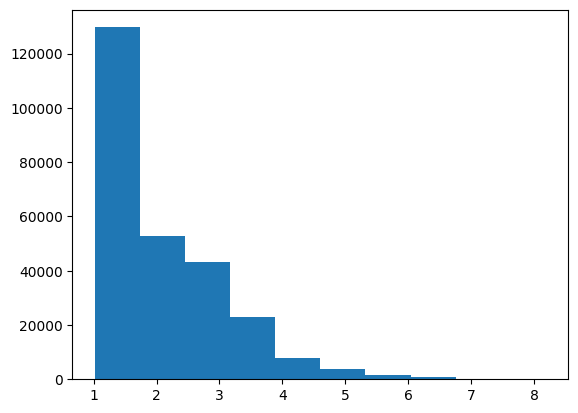

In [55]:
plt.hist((b.max(axis=0) / b.min(axis=0)).flatten())

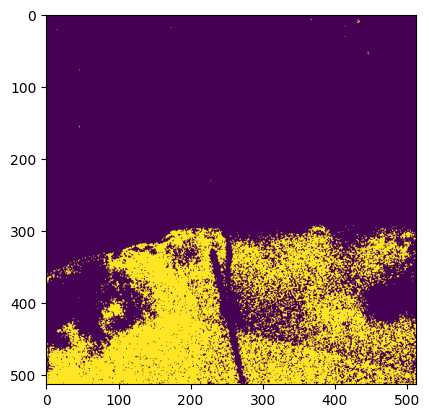

In [59]:
plt.figure()
plt.imshow((b.max(axis=0) / b.min(axis=0)) < 1.2)